In [14]:
from google.colab import drive
# drive.mount('/content/gdrive')


drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os #for the operating system operation

#Tensorflow and keras are two packages for creating neural network models

import tensorflow as tf
from tensorflow import keras

#print tensorflow (TF) version

print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.7.0


In [ ]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [15]:
#Loading the image data
import pathlib
import zipfile

def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

# dataset_url = "file:///content/gdrive/MyDrive/Colab Notebooks/mrs_fracisca/dataset.zip"
dataset = '/content/drive/MyDrive/Colab Notebooks/mrs_fracisca/dataset.zip'
unzip_data(dataset)

# data_dir = tf.keras.utils.get_file('dataset', origin=dataset_url, untar=True)
# data_dir = pathlib.Path(data_dir)

In [19]:
data_dir = 'dataset/'
print(data_dir)

dataset/


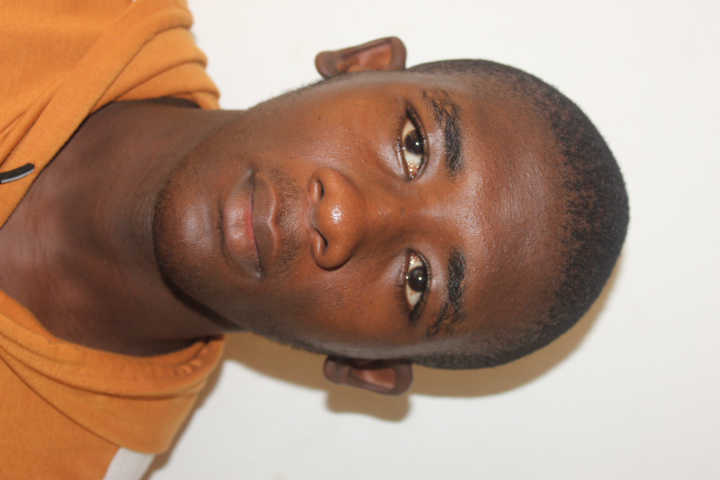

In [68]:
sample_image = '/content/dataset/Image1/IMG11.JPG'
# Image1 = list(data_dir.glob('Image1/*'))
# image1 = os.listdir(dataset)
# print(image1[0])
PIL.Image.open(str(sample_image))

In [20]:
#Data preprocessing
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode = 'categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 35 files belonging to 5 classes.
Using 28 files for training.


In [21]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
   label_mode = 'categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 35 files belonging to 5 classes.
Using 7 files for validation.


In [22]:
class_names = train_ds.class_names
print(class_names)

['Image1', 'Image2', 'Image3', 'Image4', 'Image5']


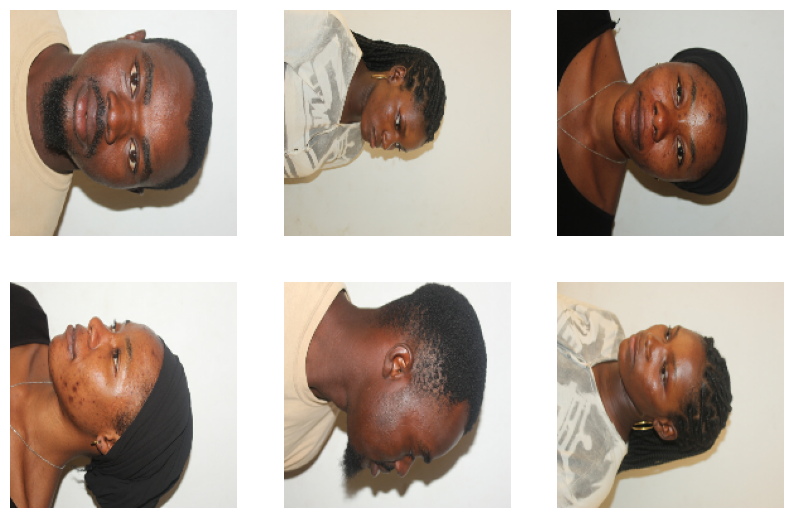

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

In [24]:
#Training The Model
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(keras.layers.Dropout(0.2))
resnet_model.add(Dense(5, activation='softmax'))

94765736/94765736 [==============================] - 6s 0us/step


## Data Augmentation

In [ ]:
#Replace the one above with this
resnet_model = Sequential([
    keras.layers.RandomFlip('horizontal_and_vertical'),
    keras.layers.RandomRotation(.2),
    keras.layers.RandomContrast(.2),
    keras.layers.RandomCrop(.2),
    keras.layers.RandomZoom(.2),
])

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(keras.layers.Dropout(0.2))
resnet_model.add(Dense(5, activation='softmax'))

In [25]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 module_wrapper_2 (ModuleWra  (None, 5)                2565      
 pper)                                                           
                                                        

In [26]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
epochs=5
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
1/1 [==============================] - 17s 17s/step - loss: 3.1646 - accuracy: 0.1429 - val_loss: 3.2830 - val_accuracy: 0.4286
Epoch 2/5
1/1 [==============================] - 0s 321ms/step - loss: 2.5502 - accuracy: 0.3929 - val_loss: 3.1904 - val_accuracy: 0.5714
Epoch 3/5
1/1 [==============================] - 0s 257ms/step - loss: 2.2908 - accuracy: 0.5714 - val_loss: 1.5395 - val_accuracy: 0.7143
Epoch 4/5
1/1 [==============================] - 0s 228ms/step - loss: 0.9092 - accuracy: 0.6786 - val_loss: 0.4442 - val_accuracy: 0.8571
Epoch 5/5
1/1 [==============================] - 0s 220ms/step - loss: 0.1690 - accuracy: 0.9643 - val_loss: 0.4825 - val_accuracy: 0.7143


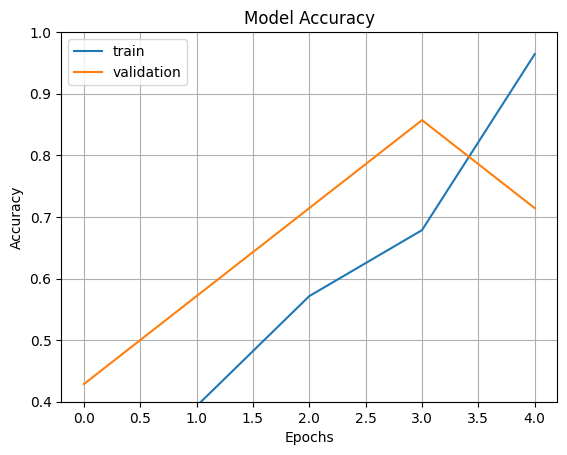

In [28]:
#Evaluating the Model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

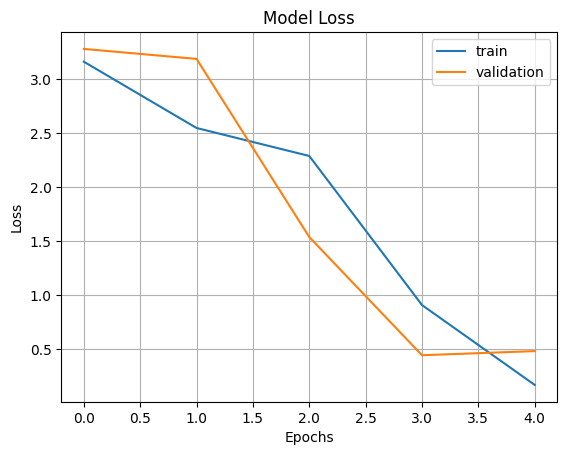

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [30]:
from keras.utils.vis_utils import plot_model

In [72]:
#Making Predictions
import cv2
sample_image = str('/content/dataset/Image2/IMG21.JPG')
image=cv2.imread(sample_image)


image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [73]:
pred = resnet_model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[1.8284332e-02 9.7456008e-01 3.9423504e-03 4.6920020e-04 2.7439345e-03]]


In [74]:
output_class = class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is Image2
